In [1]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
transactions = pd.read_csv(r"C:\python project\Pandas & Numpy course\Pandas+Course+Resources\Pandas Course Resources\project_data\project_transactions.csv",
                           dtype={"Day": "Int16",
                           "QUANTITY": "Int32",
                           "STORE_ID": "Int32",
                           "WEEK_NO": "Int8"
                           })

In [3]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [4]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   household_key      1048575 non-null  int64  
 1   BASKET_ID          1048575 non-null  int64  
 2   DAY                1048575 non-null  int64  
 3   PRODUCT_ID         1048575 non-null  int64  
 4   QUANTITY           1048575 non-null  Int32  
 5   SALES_VALUE        1048575 non-null  float64
 6   STORE_ID           1048575 non-null  Int32  
 7   RETAIL_DISC        1048575 non-null  float64
 8   WEEK_NO            1048575 non-null  Int8   
 9   COUPON_DISC        1048575 non-null  float64
 10  COUPON_MATCH_DISC  1048575 non-null  float64
dtypes: Int32(2), Int8(1), float64(4), int64(4)
memory usage: 76.0 MB


In [5]:
transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,1048575.0,1.048575e+06,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0
mean,1052.0,3.017059e+10,222.0,2459151.0,95.0,3.0,2780.0,-1.0,32.0,-0.0,-0.0
std,604.0,1.547789e+09,97.0,3138076.0,1108.0,4.0,8330.0,1.0,14.0,0.0,0.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0,1.0,-130.0,1.0,-56.0,-8.0
25%,545.0,2.878861e+10,141.0,913785.0,1.0,1.0,330.0,-1.0,21.0,0.0,0.0
50%,1038.0,3.021561e+10,225.0,1020682.0,1.0,2.0,370.0,0.0,33.0,0.0,0.0
75%,1578.0,3.153172e+10,306.0,1122358.0,1.0,3.0,421.0,0.0,44.0,0.0,0.0
max,2099.0,3.270491e+10,385.0,13986853.0,61335.0,840.0,33923.0,4.0,56.0,0.0,0.0


In [6]:
# Checking missin value counts

transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [7]:
# Calculate unique households in dataset with nunique

transactions["household_key"].nunique()

2097

In [8]:
# Calculate unique product_ids in dataset with nunique

transactions["PRODUCT_ID"].nunique()

61036

In [9]:
# x = np.linspace(-3,3,50)
# y = np.linspace(-3,3,50)
# X,Y = np.meshgrid(x,y)
# Z = X**2 + Y**2
# fig = plt.figure()
# ax = fig.add_subplot(111, projection= "3d")
# for angle in range(0,360, 3):
#     ax.clear()
#     ax.plot_surface(X,Y,Z, cmap = 'viridis')
#     ax.view_init(30, angle)
#     ax.set_title("3d Paraboloid Surface")
#     plt.pause(0.05)

# plt.show()


In [10]:
# create a discount sum column and a percentage discount column

transactions = (
    transactions
    .assign(total_discount = transactions["RETAIL_DISC"] + transactions["COUPON_DISC"],
            percentage_discount = (lambda x:(x ["total_discount"] / x["SALES_VALUE"]).abs()))
    .drop(["RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC"], axis=1)
)

#use where to cap values above 1 at 1 and below 0 at 0. Other methods could be used here as well.
transactions["percentage_discount"] = (transactions["percentage_discount"]
                                       .where(transactions["percentage_discount"]< 1 , 1.0)
                                       .where(transactions["percentage_discount"]> 0, 0))

# 'WHERE' FUNCTION UNDERSTAND IT AGAIN!!!!!!!!!!!!

transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


# Overall Statistics

In [11]:
# Total Sales

(transactions["SALES_VALUE"].sum()).round()

3199751.0

In [12]:
# Total Discount
(transactions["total_discount"].sum()).round()

-574858.0

In [13]:
# Overall Percentage discount ( sum of total_discount / Sum of sales value)

(transactions["total_discount"].sum() / transactions["SALES_VALUE"].sum()).round(4)

-0.1797

In [14]:
# Total quantity sold

transactions["QUANTITY"].sum()

99379365

In [15]:
transactions["QUANTITY"].max()

61335

In [16]:
# Full row where there is a max Value

transactions.loc[transactions["QUANTITY"].argmax()]

household_key                  630.0
BASKET_ID              29484790880.0
DAY                            185.0
PRODUCT_ID                 6534178.0
QUANTITY                     61335.0
SALES_VALUE                   150.21
STORE_ID                       384.0
WEEK_NO                         27.0
total_discount                 -6.13
percentage_discount          0.04081
Name: 399061, dtype: Float64

In [17]:
# Total sales value per basket
(
transactions["SALES_VALUE"].sum() / transactions["BASKET_ID"].nunique()).round()

28.0

In [18]:
# total Sales value per household
(
transactions["SALES_VALUE"].sum() / transactions["household_key"].nunique()).round()


1526.0

In [19]:
# Highest Quantity sold for a single item in a single row

transactions["QUANTITY"].max()

61335

<Axes: ylabel='Frequency'>

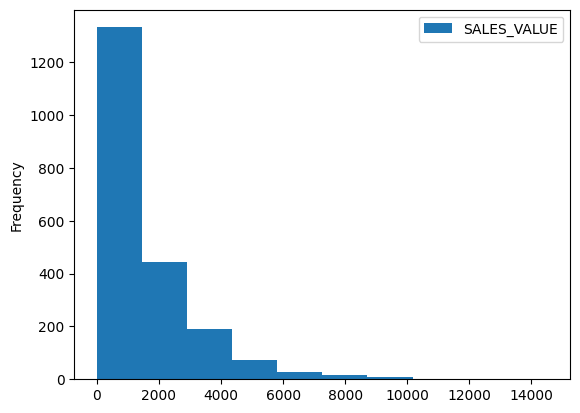

In [20]:
# plot distribution of household by total sales value

(transactions
 .groupby("household_key")
 .agg({'SALES_VALUE': 'sum'})
 .plot.hist())

In [21]:
#store top 10 household by total value and quantity 

top10_value  = (transactions
                .groupby("household_key")
                .agg({'SALES_VALUE': 'sum'})
                .sort_values("SALES_VALUE", ascending= False)
                .iloc[:10])


top10_quant = (transactions
                .groupby("household_key")
                .agg({'QUANTITY': 'sum'})
                .sort_values("QUANTITY", ascending= False)
                .iloc[:10])

In [22]:
top10_value

,SALES_VALUE
household_key,
1023,14532.63
1609,13974.81
718,10590.99
982,10195.83
1453,9563.64
1229,9490.22
1111,9373.26
1430,9140.97
232,9129.97


In [23]:
top10_quant

,QUANTITY
household_key,
755,1946574
1023,1894569
1609,1039851
13,875778
1430,833633
982,810921
1852,790236
707,788013
1314,730363


<Axes: xlabel='household_key'>

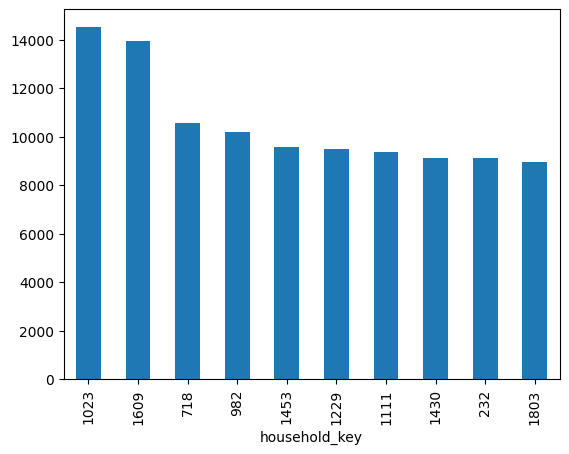

In [24]:
# top 10 household by sales value plotted

top10_value["SALES_VALUE"].plot.bar()

# Product Analysis

#### Which product had the most sales by sales_value? Plot a horizontal bar chart.

In [25]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


In [26]:
top10_products = (transactions
                  .groupby(["PRODUCT_ID"])
                  .agg({'SALES_VALUE': 'sum'})
                  .sort_values('SALES_VALUE', ascending=False)
                  .iloc[:10])

<Axes: xlabel='PRODUCT_ID'>

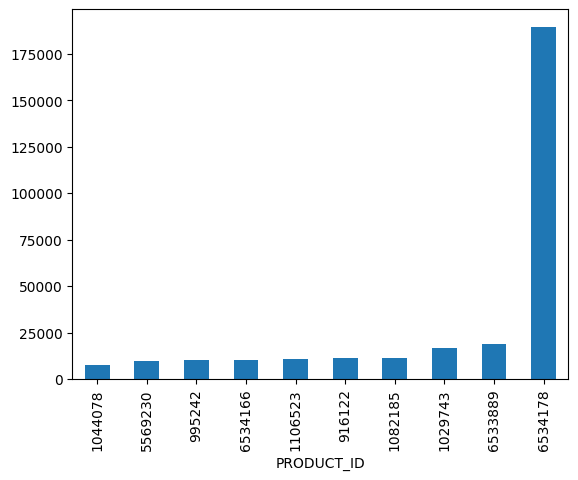

In [27]:
top10_products["SALES_VALUE"].sort_values().plot.bar()

In [28]:
# Calculate the total discount for top 10 products
# Divide that by sales value for top 10 products   

((transactions
  .query("PRODUCT_ID in @top10_products.index")
  .loc[:, "total_discount"]
  .sum())
  /(transactions
    .query("PRODUCT_ID in @top10_products.index")
    .loc[:, "SALES_VALUE"]
    .sum()))

-0.11398659221628954

In [29]:
product = pd.read_csv(r"C:\python project\Pandas & Numpy course\Pandas+Course+Resources\Pandas Course Resources\project_data\product.csv")

product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [31]:
# Look up top 10 products for household in top10_value table


top_hh_products = (transactions
                   .query("household_key in @top10_value.index")
                   .loc[:, "PRODUCT_ID"]
                   .value_counts()
                   .iloc[:10]
                   .index
                   )

top_hh_products

Index([6534178, 1082185, 1029743, 6533889, 1106523,  951590, 1127831,  860776,
        995242,  981760],
      dtype='int64', name='PRODUCT_ID')

In [ ]:
transactions